# Using Gradient Descent to Find Least Squares Logistic Regression Line on Iris Dataset
### with Python

In [77]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

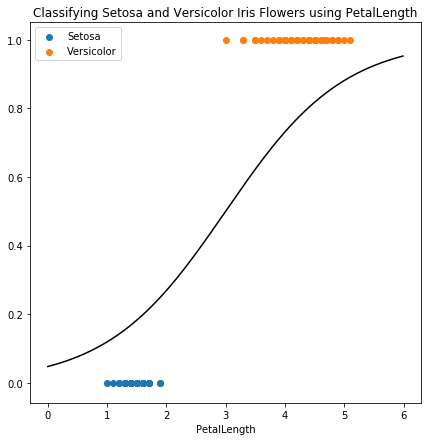

In [78]:
# Reading in the iris data into a dataframe
iris = pd.read_csv('iris_data.csv')

variable = 'PetalLength'
setosa = np.array(iris[iris["Species"]=='setosa'][variable])
versicolor = np.array(iris[iris["Species"]=='versicolor'][variable])

plt.figure(figsize=(7,7))
plt.scatter(setosa, np.array([0 for i in range(len(setosa))]), label="Setosa")
plt.scatter(versicolor, np.array([1 for i in range(len(versicolor))]), label="Versicolor")
plt.xlabel(variable)
plt.title('Classifying Setosa and Versicolor Iris Flowers using ' + variable)
plt.legend()

w = np.array([1, -3])
x = np.arange(0, 6, .01)
y = 1/(1 + np.exp(-(w[0]*x) - w[1]))
plt.plot(x, y, color='black')

In [167]:
def sigmoid(x_i, weight_vec):
    """
    Takes in an input data point and calculates the sigmoid of the data point at that weight
    and outputs either 0 or 1
    INPUTS:
        - x_i, a scalar value of a given x
        - weight_vec, an array of length 2, the slope and the intercept
    OUTPUTS:
        - σ(slope*x_i + intercept), a value in the interval [0, 1]
    """
    wtx = weight_vec[0]*x_i + weight_vec[1]
    probability = 1.0/(1.0 + np.exp(-wtx))
    return probability
    
def loss_function(input_vec, output, weight_vec):
    """
    Function to take in an input vector, an output array, and
    weight vector and returns the sum of squared residuals
    INPUTS:
        - input_vec, an array of length n that contains all the input data
        - output, an array of length n that contains all the outputs
        - weight_vec, an array with 2 elements, the slope and the intercept
    OUTPUTS:
        - total_loss, the sum of squared residuals, a scalar float value
    """
    n = len(input_vec)
    total_loss = 0
    
    total_loss = 0
    for j in range(n):
        x_j = input_vec[j]
        y_j = output[j]
        total_loss += (y_j - sigmoid(x_j, weight_vec))**2
    return total_loss / n

def loss_gradient(input_vec, output, weight_vec):
    """
    Function to take in an input DataFrame, an output array, and
    weight vector and returns the sum of squared residuals
    INPUTS:
        - input_vec, an array with the input data of length n
        - output, an array of length n that is the outputs
        - weight_vec, an array of 2 weights where the first weight is the slope
                    and the second weight is the intercept
    OUTPUTS:
        - The computed gradient of the Loss function at the given weights
    """
    n = len(input_vec)
    sum_w1 = 0
    sum_w2 = 0
    for j in range(n):
        x_j = input_vec[j]
        y_j = output[j]
        σ = sigmoid(x_j, weight_vec)
        
        sum_w1 += (σ - y_j) * (σ**(-2)) * (np.exp(-(weight_vec[0]*x_j + weight_vec[1]))) * x_j
        sum_w2 += (σ - y_j) * (σ**(-2)) * (np.exp(-(weight_vec[0]*x_j + weight_vec[1]))) 
    sum_w1 *= 2/n
    sum_w2 *= (-2)/n
    return np.array([sum_w1, sum_w2])

def Logistic_Regression(input_vec, output, weight_vec, loss_fxn, loss_fxn_prime, α):
    """
    This is Least Squares Function that calculates an optimal slope
    and intercept for the given input_vec (x) and output (y)
    INPUTS:
        - input_vec, an array of length n that contains all the input data
        - output, an array of length n that contains all the outputs
        - weight_vec, an array with 2 elements, the slope and the intercept
        - loss_fxn, the loss function, a sum of squared residuals
        - loss_fxn_prime, the gradient of the loss function
        - α, the learning rate
    OUTPUTS:
        - w_hat, the final and optimal slope and intercept
    """
    num_iterations = 0
    error = float(1.0)
    w_k = weight_vec
    weights = []
    all_losses = []
    while (num_iterations <= 10000) & (error > .00001):
        w_k1 = w_k - α*loss_fxn_prime(input_vec, output, w_k)
        error = abs(loss_fxn(input_vec, output, w_k1) - loss_fxn(input_vec, output, w_k))
        weights.append(w_k1)
        all_losses.append(loss_function(input_vec, output, w_k1))
        num_iterations += 1
        w_k = w_k1
    return w_k1, weights, all_losses

In [169]:
weights = np.array([1, -2])
input_vec = np.concatenate([setosa, versicolor])
outputs = np.concatenate([[0 for i in range(len(setosa))], [1 for i in range(len(versicolor))]])
regression = Logistic_Regression(input_vec, outputs, weights, loss_function, loss_gradient, .001)
regression[0]

array([ 0.87736126, -1.91251676])

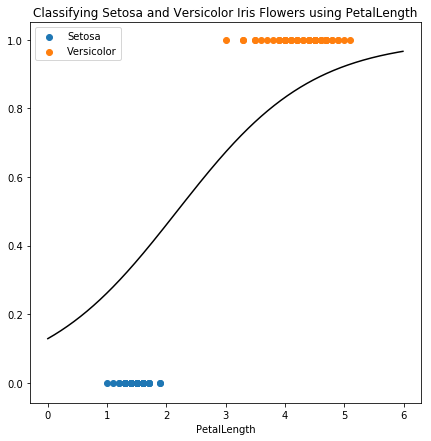

In [170]:
# Visualizing what data looks like
plt.figure(figsize=(7,7))
plt.scatter(setosa, np.array([0 for i in range(len(setosa))]), label="Setosa")
plt.scatter(versicolor, np.array([1 for i in range(len(versicolor))]), label="Versicolor")
plt.xlabel(variable)
plt.title('Classifying Setosa and Versicolor Iris Flowers using ' + variable)
plt.legend()

w = regression[0]
x = np.arange(0, 6, .01)
y = 1/(1 + np.exp(-(w[0]*x) - w[1]))
plt.plot(x, y, color='black')

Text(0.5, 1.0, 'How the Weights Changed as the Algorithm Ran')

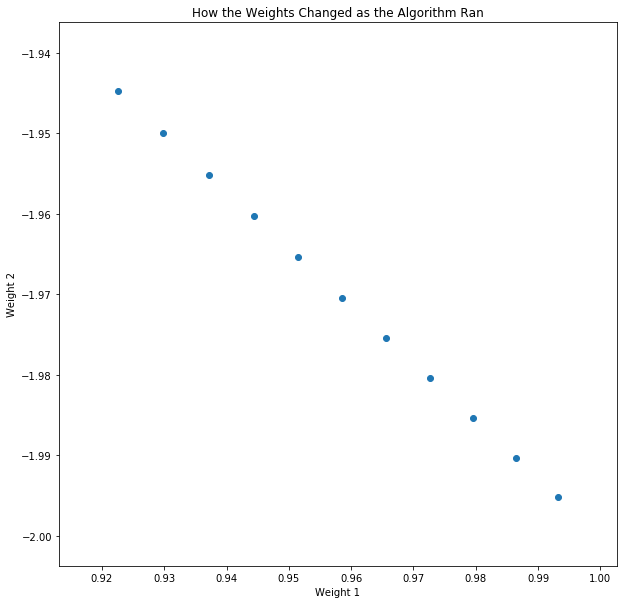

In [160]:
w1 = []
w2 = []
for i in regression[1]:
    w1.append(i[0])
    w2.append(i[1])
    
plt.figure(figsize=(10, 10))
plt.scatter(w1, w2)
plt.ylabel('Weight 2')
plt.xlabel('Weight 1')
plt.title('How the Weights Changed as the Algorithm Ran')

Text(0.5, 1.0, 'Iteration Number vs. Total Loss for LSR')

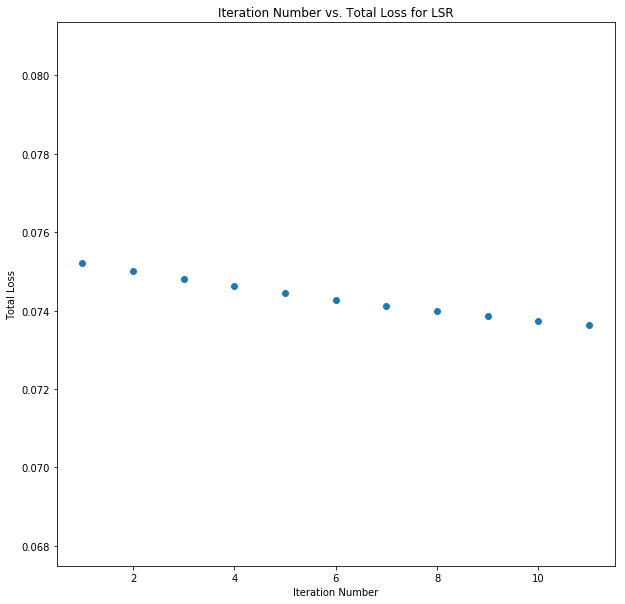

In [156]:
losses = regression[2]

plt.figure(figsize=(10, 10))
plt.scatter(range(1, len(losses)+1), regression[2])
plt.ylabel('Total Loss')
plt.xlabel('Iteration Number')
plt.title('Iteration Number vs. Total Loss for LSR')

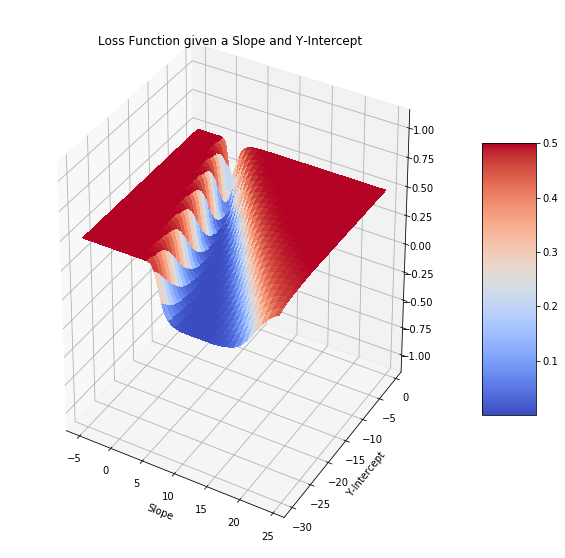

In [157]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(-5, 25, 0.5)
y = np.arange(-30, 0, 0.5)
x, y = np.meshgrid(x, y)
z = loss_function(input_vec, outputs, np.array([x, y]))

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.xlabel('Slope')
plt.ylabel('Y-Intercept')
plt.title('Loss Function given a Slope and Y-Intercept')

# Customize the z axis.
ax.set_zlim(-1.11, 1.11)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()